In [1]:
import sys
sys.path.append(r'../')
import os
os.chdir('../')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
from functions import Database, preprocess_data, prep_data, BunDLeNet, train_model, plotting_neuronal_behavioural, plot_latent_timeseries, plot_phase_space, rotating_plot

%reload_ext autoreload
%autoreload 2

In [11]:
worm_num = 0
b_neurons = [
	'AVAR',
	'AVAL',
	'SMDVR',
	'SMDVL',
	'SMDDR',
	'SMDDL',
	'RIBR',
	'RIBL'
]
data = Database(data_set_no=worm_num)
data.exclude_neurons(b_neurons)
X = data.neuron_traces.T
B = data.states
state_names = ['Dorsal turn', 'Forward', 'No state', 'Reverse-1', 'Reverse-2', 'Sustained reversal', 'Slowing', 'Ventral turn']
X.shape, B.shape

((3137, 103), (3137,))

In [35]:

for worm_num in range(5):
    print('worm number ', worm_num)
    
    data = Database(data_set_no=worm_num)
    data.exclude_neurons(b_neurons)
    X = data.neuron_traces.T
    B = data.states
    state_names = ['Dorsal turn', 'Forward', 'No state', 'Reverse-1', 'Reverse-2', 'Sustained reversal', 'Slowing', 'Ventral turn']
    print('X.shape, B.shape: ', X.shape, B.shape)
    
    ### Loading embeddings
    Y = np.loadtxt('data/generated/saved_Y/comparable_embeddings/Y0__BunDLeNet_worm_' + str(worm_num))
    B = np.loadtxt('data/generated/saved_Y/comparable_embeddings/B__BunDLeNet_worm_' + str(worm_num))
    print('Y.shape, B.shape: ', Y.shape, B.shape)
    
    print('difference: ', X.shape[0] - Y.shape[0], '\n')


worm number  0
X.shape, B.shape:  (3137, 103) (3137,)
Y.shape, B.shape:  (3122, 3) (3122,)
difference:  15 

worm number  1
X.shape, B.shape:  (3134, 127) (3134,)
Y.shape, B.shape:  (3119, 3) (3119,)
difference:  15 

worm number  2
X.shape, B.shape:  (3059, 123) (3059,)
Y.shape, B.shape:  (3044, 3) (3044,)
difference:  15 

worm number  3
X.shape, B.shape:  (3311, 119) (3311,)
Y.shape, B.shape:  (3296, 3) (3296,)
difference:  15 

worm number  4
X.shape, B.shape:  (3021, 121) (3021,)
Y.shape, B.shape:  (3006, 3) (3006,)
difference:  15 



In [36]:
data.state_names

['dt', 'fwd', 'nostate', 'rev1', 'rev2', 'revsus', 'slow', 'vt']

In [15]:
Y = np.loadtxt('data/generated/saved_Y/Y0__BunDLeNet_worm_0')
B = np.loadtxt('data/generated/saved_Y/B__BunDLeNet_worm_0').astype(int)
Y.shape, B.shape

((3122, 3), (3122,))

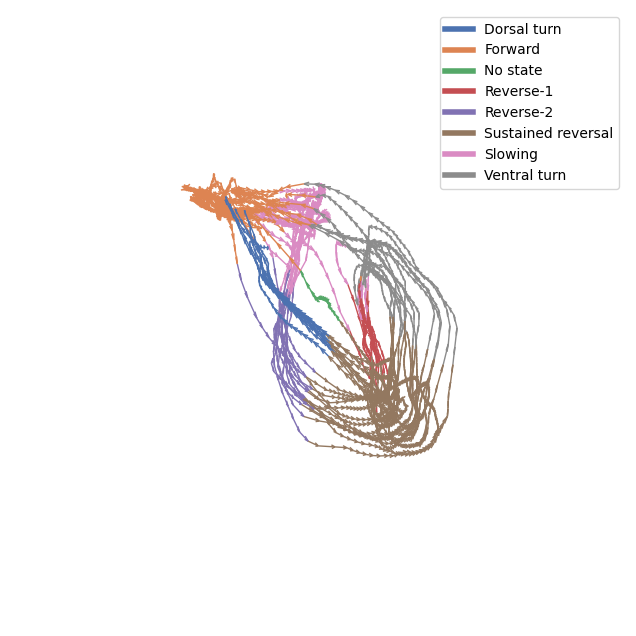

(<Figure size 800x800 with 1 Axes>, <Axes3D: >)

In [16]:
plot_phase_space(Y, B, state_names)